In [150]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

In [151]:
#Path of CSV Files
file_path1 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2016_v02.csv'
file_path2 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2017_v02.csv'
file_path3 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2018_v02.csv'
file_path4 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2019_v02.csv'
file_path5 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2020_v02.csv'
file_path6 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2021_v02.csv'
file_path7 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2022_v02.csv'
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)
df5 = pd.read_csv(file_path5)
df6 = pd.read_csv(file_path6)
df7 = pd.read_csv(file_path7)
# Vertically concatenating the Files to make a single DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df

,Time,V1,V2,V3,S1,S2,S3,S4,S5,S6,...,S42,S43,S44,S45,S46,S47,S48,S49,S50,Kp
0,01/01/2016 0:00,6.4820,-2.7747,-13.2571,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,01/01/2016 0:10,6.2731,-2.6056,-13.2409,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2016 0:20,6.5550,-2.4089,-12.9039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2016 0:30,5.2386,-1.8315,-13.4844,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2016 0:40,4.8423,-1.8894,-13.5374,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,31/12/2022 23:10,-4.9968,1.6259,0.8494,16.1399,0.2317,0.2317,0.4491,3.3471,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52556,31/12/2022 23:20,-4.0324,3.3678,0.8213,22.9514,0.2317,0.2356,0.6609,7.6407,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52557,31/12/2022 23:30,-4.4579,2.8576,0.7823,18.6864,0.2317,0.2554,0.3915,4.7595,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52558,31/12/2022 23:40,-3.5223,2.3134,0.8756,26.5913,0.2317,0.3429,3.8333,9.5035,0.2317,...,282.8825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df['NaN_count'] = df.isna().sum(axis=1) #Counting missing values in every Row and adding a separate column for the sum
df['NaN_count'] = df['NaN_count'].astype(float) 
df['Kp'] = df['Kp'].interpolate() #Interpolating Kp Values
df['V1'] = df['V1'].interpolate() #Interpolating Vectors because there are not mush missing there
df['V2'] = df['V2'].interpolate()
df['V3'] = df['V3'].interpolate()
df.index = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M') # Setting Index for datetime
df

,Time,V1,V2,V3,S1,S2,S3,S4,S5,S6,...,S43,S44,S45,S46,S47,S48,S49,S50,Kp,NaN_count
Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,01/01/2016 0:00,6.4820,-2.7747,-13.2571,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,50.0
2016-01-01 00:10:00,01/01/2016 0:10,6.2731,-2.6056,-13.2409,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.962944,51.0
2016-01-01 00:20:00,01/01/2016 0:20,6.5550,-2.4089,-12.9039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.925889,51.0
2016-01-01 00:30:00,01/01/2016 0:30,5.2386,-1.8315,-13.4844,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.888833,51.0
2016-01-01 00:40:00,01/01/2016 0:40,4.8423,-1.8894,-13.5374,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.851778,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:10:00,31/12/2022 23:10,-4.9968,1.6259,0.8494,16.1399,0.2317,0.2317,0.4491,3.3471,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,12.0
2022-12-31 23:20:00,31/12/2022 23:20,-4.0324,3.3678,0.8213,22.9514,0.2317,0.2356,0.6609,7.6407,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,11.0
2022-12-31 23:30:00,31/12/2022 23:30,-4.4579,2.8576,0.7823,18.6864,0.2317,0.2554,0.3915,4.7595,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,11.0


In [153]:
lag = 150 # setting lag in Kp values to Predict into the Future, to find lag in "minutes"
lag = lag//10 #divind by resample rate of data to match lag exactly
df['Kp'] = df['Kp'].shift(-lag)
df = df.drop(df.index[-lag:])  #dropping Last Rows equal to lag becaause they are now Missing because of values shifting up
df

,Time,V1,V2,V3,S1,S2,S3,S4,S5,S6,...,S43,S44,S45,S46,S47,S48,S49,S50,Kp,NaN_count
Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,01/01/2016 0:00,6.4820,-2.7747,-13.2571,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.444167,50.0
2016-01-01 00:10:00,01/01/2016 0:10,6.2731,-2.6056,-13.2409,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.407111,51.0
2016-01-01 00:20:00,01/01/2016 0:20,6.5550,-2.4089,-12.9039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.370056,51.0
2016-01-01 00:30:00,01/01/2016 0:30,5.2386,-1.8315,-13.4844,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333000,51.0
2016-01-01 00:40:00,01/01/2016 0:40,4.8423,-1.8894,-13.5374,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.314500,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:40:00,31/12/2022 20:40,-3.9703,2.1491,-2.7547,31.5775,0.2317,1.4792,8.6068,13.4566,0.5320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,9.0
2022-12-31 20:50:00,31/12/2022 20:50,-4.6536,0.8155,-2.8080,26.2527,0.2317,0.2792,0.4936,13.8583,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,11.0
2022-12-31 21:00:00,31/12/2022 21:00,-3.9741,-0.6104,-3.3953,34.7866,0.2317,0.6035,4.2842,17.8210,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,9.0


In [154]:
kp_column = 'Kp'  #selecting header for Kp values
sensor_columns = [col for col in df.columns if col != 'Time' and col != kp_column]  #selecting all other columns except time and Kp for Sensor data
kp_data = df[kp_column].values.reshape(-1, 1)
sensor_data = df[sensor_columns].values

In [155]:
#in case of missing data over a long period, I dropped some data to improve learning
# Define the date range to drop
start_date = '2019-06-20'
end_date = '2020-07-01'
# Creating a boolean mask to select rows outside the date range
mask = (df['Time'] < start_date) | (df['Time'] > end_date)
# Using the mask to filter the DataFrame
filtered_df = df[mask]
df.reset_index(drop=True, inplace=True)

<Axes: >

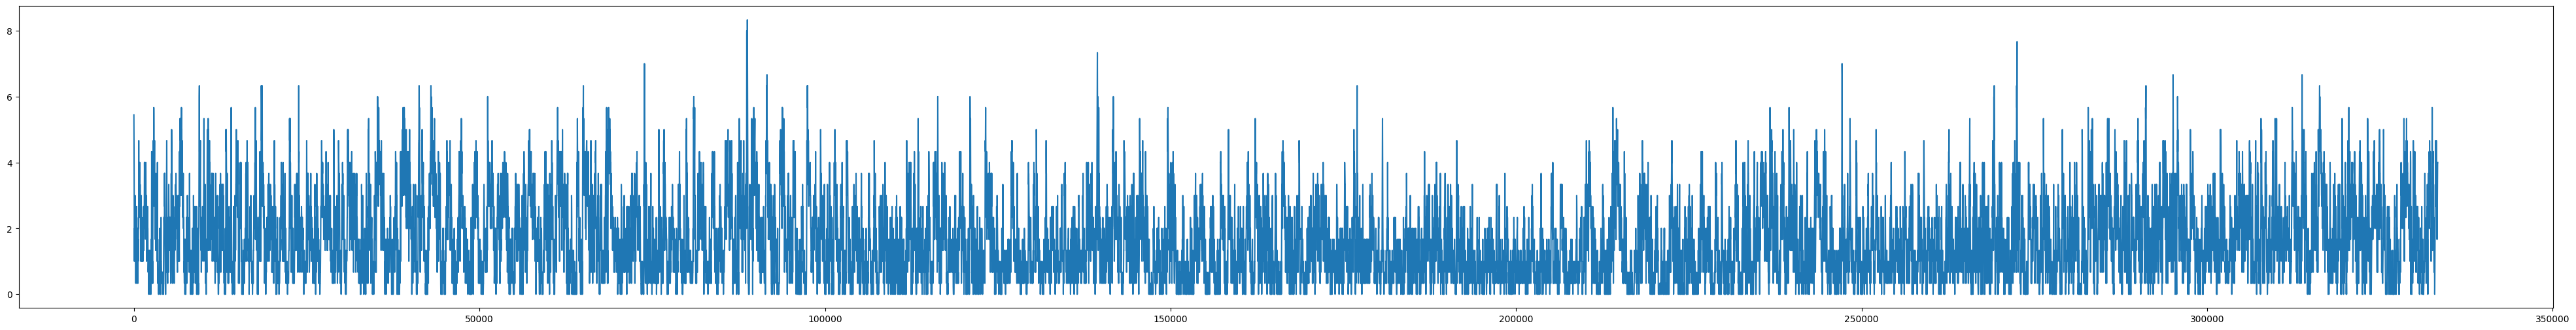

In [156]:
#Plotting Kp values to check for errors
kpd = df['Kp']
#nad = df['NaN_count']
ten_percent_index = int(len(kpd) * 1)
#ten_percent_index3 = int(len(nad) * 0.1)
first_10_percent = kpd.iloc[:ten_percent_index]
#first_10_percent3 = nad.iloc[:ten_percent_index3]
plt.figure(figsize=(50, 6))
first_10_percent.plot()
#first_10_percent3.plot()

In [157]:
kp_data[:10000]

array([[5.44416667],
       [5.40711111],
       [5.37005556],
       ...,
       [1.259     ],
       [1.2405    ],
       [1.222     ]])

In [158]:
sensor_data

array([[  6.482 ,  -2.7747, -13.2571, ...,      nan,      nan,  50.    ],
       [  6.2731,  -2.6056, -13.2409, ...,      nan,      nan,  51.    ],
       [  6.555 ,  -2.4089, -12.9039, ...,      nan,      nan,  51.    ],
       ...,
       [ -3.9741,  -0.6104,  -3.3953, ...,      nan,      nan,   9.    ],
       [ -4.6264,  -0.2544,  -2.3128, ...,      nan,      nan,  51.    ],
       [ -3.5813,   1.7593,  -3.3285, ...,      nan,      nan,  51.    ]])

In [159]:
#Handling the Missing Values
#sensor_data = np.nan_to_num(sensor_data, nan=0)
column_means = np.nanmean(sensor_data, axis=0)
nan_indices = np.isnan(sensor_data)  # Get a boolean mask for NaN values
sensor_data[nan_indices] = np.take(column_means, np.where(nan_indices)[1])
sensor_data

array([[ 6.48200000e+00, -2.77470000e+00, -1.32571000e+01, ...,
         4.11806214e+02,  3.64677132e+02,  5.00000000e+01],
       [ 6.27310000e+00, -2.60560000e+00, -1.32409000e+01, ...,
         4.11806214e+02,  3.64677132e+02,  5.10000000e+01],
       [ 6.55500000e+00, -2.40890000e+00, -1.29039000e+01, ...,
         4.11806214e+02,  3.64677132e+02,  5.10000000e+01],
       ...,
       [-3.97410000e+00, -6.10400000e-01, -3.39530000e+00, ...,
         4.11806214e+02,  3.64677132e+02,  9.00000000e+00],
       [-4.62640000e+00, -2.54400000e-01, -2.31280000e+00, ...,
         4.11806214e+02,  3.64677132e+02,  5.10000000e+01],
       [-3.58130000e+00,  1.75930000e+00, -3.32850000e+00, ...,
         4.11806214e+02,  3.64677132e+02,  5.10000000e+01]])

In [160]:
# Normalizing the data to the range [0, 1] separately for Kp and sensor inputs
scaler_kp = MinMaxScaler()
scaler_data = MinMaxScaler()

kp_data_scaled = scaler_kp.fit_transform(kp_data)
sensor_data_scaled = scaler_data.fit_transform(sensor_data)
sensor_data_scaled.shape

(333345, 54)

In [161]:
kp_data_scaled

array([[0.65332613],
       [0.64887929],
       [0.64443244],
       ...,
       [0.4800192 ],
       [0.4800192 ],
       [0.4800192 ]])

In [162]:
kp_data_scaled.shape

(333345, 1)

In [163]:
# Defining a function to prepare data for the LSTM (i.e function to prepare sequences)
def create_sequences(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :-1])
        Y.append(data[i + look_back, 54])  # Kp values
    return np.array(X), np.array(Y)

In [164]:
# Setting the look-back period (number of past time steps to consider/Window Size)
look_back = 10  #in hours
look_back = 10*6 #converting hours to match sample rate(because six samples are equal to 1 hour)

In [165]:
# Creating sequences for training,
X, Y = create_sequences(np.hstack((sensor_data_scaled, kp_data_scaled)), look_back)

MemoryError: Unable to allocate 8.05 GiB for an array with shape (333285, 60, 54) and data type float64

In [ ]:
X

array([[[0.4731126 , 0.58458886, 0.43169265, ..., 0.53592083,
         0.85157636, 0.92592593],
        [0.49471419, 0.58738666, 0.42324235, ..., 0.53592083,
         0.85157636, 0.94444444],
        [0.52343098, 0.59546538, 0.4281009 , ..., 0.53592083,
         0.85157636, 0.94444444],
        ...,
        [0.49862899, 0.59548932, 0.48422163, ..., 0.53592083,
         0.85157636, 0.57407407],
        [0.46003023, 0.53759068, 0.4132242 , ..., 0.53592083,
         0.85157636, 0.55555556],
        [0.37214133, 0.54875108, 0.54137965, ..., 0.53592083,
         0.85157636, 0.57407407]],

       [[0.49471419, 0.58738666, 0.42324235, ..., 0.53592083,
         0.85157636, 0.94444444],
        [0.52343098, 0.59546538, 0.4281009 , ..., 0.53592083,
         0.85157636, 0.94444444],
        [0.51232666, 0.60961169, 0.46501993, ..., 0.53592083,
         0.85157636, 0.94444444],
        ...,
        [0.46003023, 0.53759068, 0.4132242 , ..., 0.53592083,
         0.85157636, 0.55555556],
        [0.3

In [ ]:
Y

array([0.27193537, 0.25731179, 0.24268821, ..., 0.05258171, 0.05258171,
       0.05258171])

In [ ]:
Y.shape

(70341,)

In [ ]:
# Splitting data into training and testing sets
train_size = int(len(X) * 0.7)  # 70% for training
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [ ]:
X.shape

(70341, 60, 54)

In [ ]:
X_train

array([[[0.4731126 , 0.58458886, 0.43169265, ..., 0.53592083,
         0.85157636, 0.92592593],
        [0.49471419, 0.58738666, 0.42324235, ..., 0.53592083,
         0.85157636, 0.94444444],
        [0.52343098, 0.59546538, 0.4281009 , ..., 0.53592083,
         0.85157636, 0.94444444],
        ...,
        [0.49862899, 0.59548932, 0.48422163, ..., 0.53592083,
         0.85157636, 0.57407407],
        [0.46003023, 0.53759068, 0.4132242 , ..., 0.53592083,
         0.85157636, 0.55555556],
        [0.37214133, 0.54875108, 0.54137965, ..., 0.53592083,
         0.85157636, 0.57407407]],

       [[0.49471419, 0.58738666, 0.42324235, ..., 0.53592083,
         0.85157636, 0.94444444],
        [0.52343098, 0.59546538, 0.4281009 , ..., 0.53592083,
         0.85157636, 0.94444444],
        [0.51232666, 0.60961169, 0.46501993, ..., 0.53592083,
         0.85157636, 0.94444444],
        ...,
        [0.46003023, 0.53759068, 0.4132242 , ..., 0.53592083,
         0.85157636, 0.55555556],
        [0.3

In [ ]:
# LSTM model Architecture
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 54), return_sequences=False))
model.add(Dense(1))

# Compile the model
custom_optimizer = RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-07)

model.compile(loss='mean_squared_error', optimizer=custom_optimizer)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                30464     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 30529 (119.25 KB)
Trainable params: 30529 (119.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Trainning the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
770/770 [==============================] - 35s 41ms/step - loss: 0.0173
Epoch 2/10
770/770 [==============================] - 29s 38ms/step - loss: 0.0127
Epoch 3/10
770/770 [==============================] - 29s 37ms/step - loss: 0.0117
Epoch 4/10
770/770 [==============================] - 28s 37ms/step - loss: 0.0112
Epoch 5/10
770/770 [==============================] - 29s 38ms/step - loss: 0.0108
Epoch 6/10
770/770 [==============================] - 33s 43ms/step - loss: 0.0105
Epoch 7/10
770/770 [==============================] - 33s 43ms/step - loss: 0.0102
Epoch 8/10
770/770 [==============================] - 36s 46ms/step - loss: 0.0099
Epoch 9/10
770/770 [==============================] - 34s 44ms/step - loss: 0.0097
Epoch 10/10
770/770 [==============================] - 34s 44ms/step - loss: 0.0095


In [ ]:
# EPredicting values on traing and testing sensor inputs
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

660/660 [==============================] - 8s 12ms/step


In [ ]:
train_predict

array([[0.13414052],
       [0.1442764 ],
       [0.16214724],
       ...,
       [0.1063518 ],
       [0.10446407],
       [0.10569655]], dtype=float32)

In [ ]:
# Inverse transform the scaled predictions to original scale for Kp
train_predict = scaler_kp.inverse_transform(train_predict)
test_predict = scaler_kp.inverse_transform(test_predict)
# Calculate root mean squared error for evaluation
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1.2465726846221934
Test RMSE: 1.1470520454797886


In [ ]:
Y_train

array([0.27193537, 0.25731179, 0.24268821, ..., 0.05258171, 0.05258171,
       0.05258171])

In [ ]:
Y_train = Y_train.reshape(-1, 1) #Reshaping Y_train to perform inverse transformation
Y_train = scaler_kp.inverse_transform(Y_train)
Y_train

array([[1.72216667],
       [1.62955556],
       [1.53694444],
       ...,
       [0.333     ],
       [0.333     ],
       [0.333     ]])

In [ ]:
train_predict.shape

(49238, 1)

In [ ]:
Y_train.shape

(49238, 1)

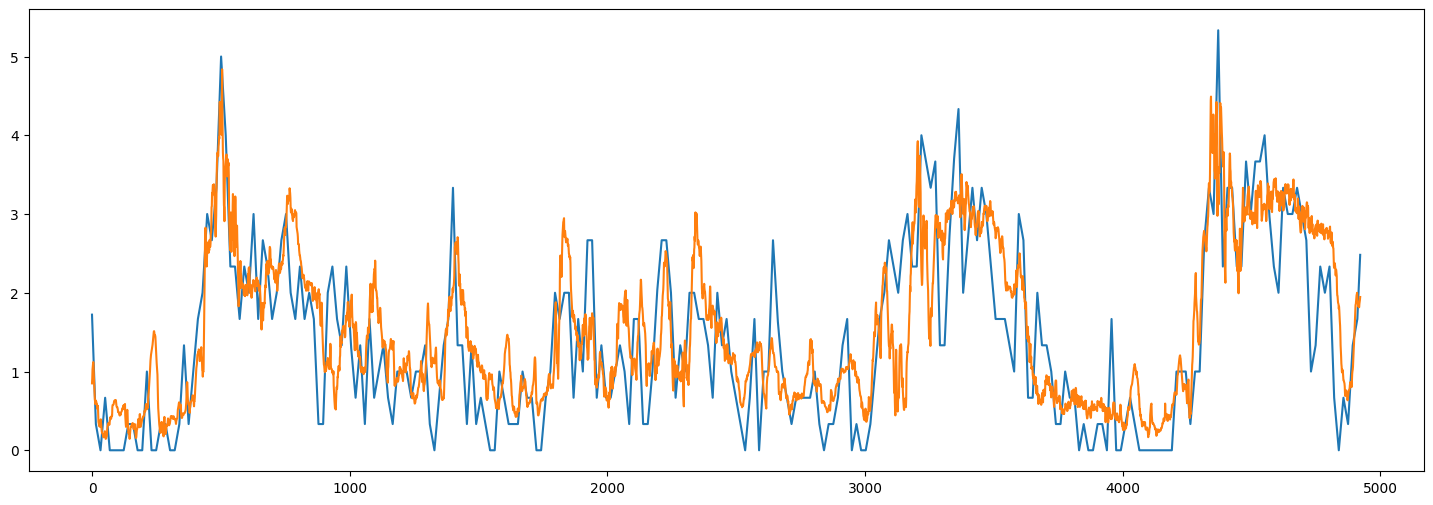

In [ ]:
#plotting the actual Kp values and predicted on Training set
ten_percent_index = int(len(Y_train) * 0.1)
ten_percent1_index = int(len(train_predict) * 0.1)
plt.figure(figsize=(18, 6))
plt.plot(Y_train[:ten_percent_index], label='Y_train (First 10%)')
plt.plot(train_predict[:ten_percent1_index], label='train_predict (First 10%)')

In [ ]:
Y_test

array([0.05258171, 0.05258171, 0.05258171, ..., 0.05258171, 0.05258171,
       0.05258171])

In [ ]:
Y_test = Y_test.reshape(-1, 1)
Y_test = scaler_kp.inverse_transform(Y_test)
Y_test

array([[0.333],
       [0.333],
       [0.333],
       ...,
       [0.333],
       [0.333],
       [0.333]])

In [ ]:
test_predict

array([[0.6648966 ],
       [0.6169418 ],
       [0.6184902 ],
       ...,
       [0.8471718 ],
       [0.77778023],
       [0.76076615]], dtype=float32)

In [ ]:
Y_test

array([[0.333],
       [0.333],
       [0.333],
       ...,
       [0.333],
       [0.333],
       [0.333]])

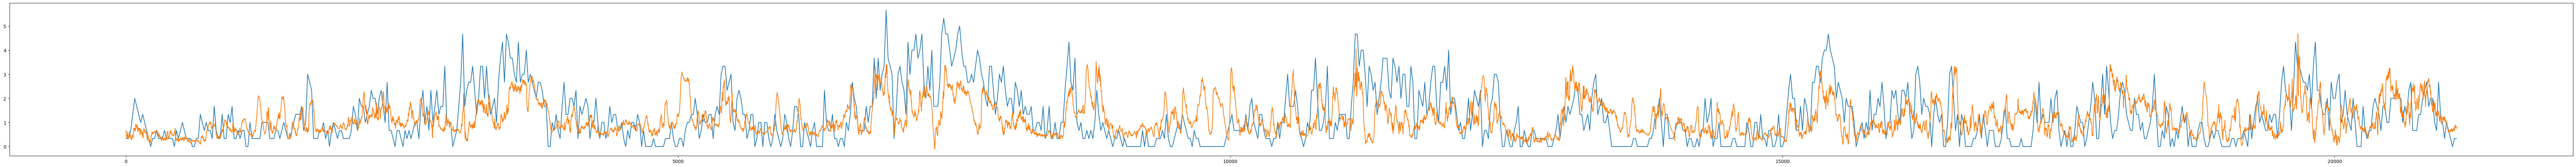

In [ ]:
#plotting the actual Kp values and predicted on Testing set
ten_percent_index = int(len(Y_test) * 1)
ten_percent1_index = int(len(test_predict) * 1)
plt.figure(figsize=(100, 6))
plt.plot(Y_test[:ten_percent_index], label='Y_test (First 10%)')
plt.plot(test_predict[:ten_percent1_index], label='test_predict (First 10%)')

In [ ]:
#to calculate average percentage error
#res = ((test_predict-Y_test)/Y_test)*100
#res = abs(np.round((np.mean(res)),3))
#res
res = np.round(np.mean(abs(test_predict-Y_test)),4)
res

0.7603

In [ ]:

if res<z:
    z=res
    n=lag

n 
    


NameError: name 'z' is not defined

In [ ]:
x=1
if x==1:
    # Save the model architecture to a JSON file
    model_json = model.to_json()
    with open('lstm_model.json', 'w') as json_file:
        json_file.write(model_json)

    # Save the model weights to an HDF5 file
    model.save_weights('lstm_model_weights.h5')

    # Save the MinMaxScaler for Kp data
    import joblib
    joblib.dump(scaler_kp, 'scaler_kp.pkl')
    joblib.dump(scaler_data, 'scaler_sensor.pkl')